## appendix 1 --- APLpy 

FITSデータにWCSが入っていれば、APLpyを使って簡単に(X, Y)ではなく(RA,DEC)で図を作成することができます。

https://aplpy.github.io が公式ページです。 
ここのDocumentationのリンクに詳細な説明があります。http://aplpy.readthedocs.io/en/stable/

下のリンクからサンプルデータをダウンロードしてください。  
http://aplpy.github.com/downloads/tutorial.tar.gz  
tar + gzを展開するとtutorialというディレクトリができますので、適当なところに置いてください。
(例えば下のように、この講習会のディレクトリにaplpyというディレクトリを作ってその下。) 


In [1]:
cd aplpy/tutorial/

/Users/yas.nakajima/gitlab/adc2018python/aplpy/tutorial


In [2]:
ls

data/     fits/     graphics/


tutorialの中で、カレントディレクトリに data と fitsがあることを前提として以下の作業を進めます。

In [3]:
%matplotlib inline

APLpyは内部でmatplotlibを使っています。上のように宣言しておくとnotebook内に図が表示されます。

In [4]:
import aplpy

In [5]:
import numpy as np # あとで使います

fitsディレクトリの中のサンプルFITSデータのひとつを表示させます。  
デフォルトでは表示のグレイスケールが自動で設定されます。

INFO: Auto-setting vmin to  3.554e+02 [aplpy.core]
INFO: Auto-setting vmax to  1.798e+03 [aplpy.core]


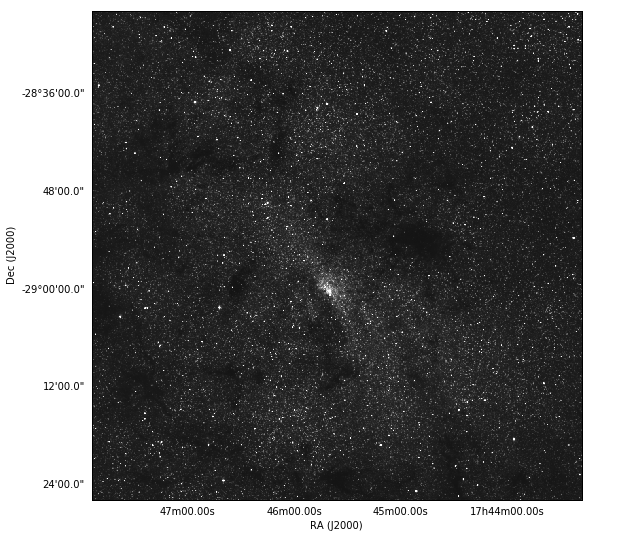

In [6]:
figure = aplpy.FITSFigure('./fits/2MASS_k.fits')
figure.show_grayscale()

ちゃんと横軸と縦軸がRAとDECになっていますね。  

次に、表示を少しカスタマイズします。  
- aplpy.FITSFigure()の引数 figsize=()で表示サイズを変更
- .show_grayscale()メソッドの引数 vmin=, vmax= で表示のグレイスケールの範囲を設定

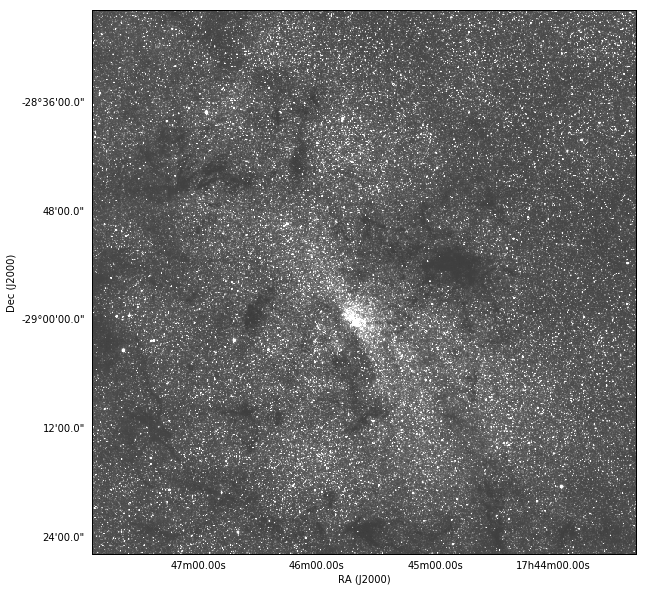

In [7]:
figure = aplpy.FITSFigure('./fits/2MASS_k.fits', figsize=(10, 10))
figure.show_grayscale(vmin=300, vmax=1000)

暗い星まで表示され、暗黒星雲が見やすくなりました。  

次に、ここに星を重ねてプロットします。星の座標がRA, DECのリストになっていれば簡単です。

numpyのloadtxtを使って、data/yso_wcs_only.txtを読み込みます。このファイルには、YSO(Young Stellar Object)の座標(RA, DEC)が1列目と2列目に記載されています。

In [8]:
data = np.loadtxt('data/yso_wcs_only.txt')
ra, dec = data[:, 0], data[:, 1]

.show_markers()メソッドを使います。その引数として、RAとDECのndarrayを入れてやります。

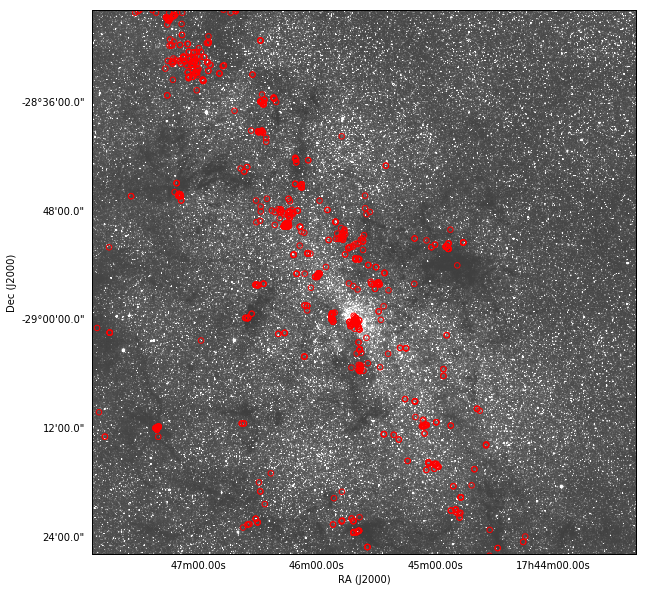

In [9]:
figure = aplpy.FITSFigure('./fits/2MASS_k.fits', figsize=(10, 10))
figure.show_markers(ra, dec)
figure.show_grayscale(vmin=300, vmax=1000)

できました！  

.savefig()メソッドを使うと、ファイルとして保存することができます。
'eps', 'ps', 'pdf', 'svg', 'png' が使用可能です。

In [10]:
figure.savefig('myaplpy.png')